# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
>**PCA**  
tries to find correlations by looking for maximum variance. So the first dimensions for the PCs are, what has the largest range of values in the data set.  
Possible first dimensions:
- the amount in witch a certain category is replenished
- the size of the customers business

>**ICA**  
tries to transform the feature space towards maximal independance. So the first dimension will contain the most common information in the data set. And the following dimensions will consist of the least common information.  
Possible type of vectors dimensions: 
- the average replenishment profile of a category
- different replenishment profiles

source: https://www.udacity.com/course/viewer#!/c-ud727-nd/l-5453051650/m-661438547

### PCA

In [4]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components = data.shape[1])
pca.fit(data)
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

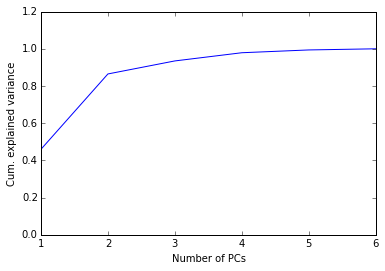

In [5]:
# PCs variance plot

cs = np.cumsum(pca.explained_variance_ratio_)
#print cs
#https://github.com/numpy/numpy/blob/v1.10.0/numpy/core/fromnumeric.py#L2038-L2106
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.cumsum.html

# Number array for PCs
num_PCs = np.arange(data.shape[1])+1
#print np.arange(data.shape[1])+1
#http://docs.scipy.org/doc/numpy-1.10.1/user/basics.creation.html

plt.plot(num_PCs, cs)
#http://matplotlib.org/users/pyplot_tutorial.html

plt.axis([1, data.shape[1], 0, 1.2])
plt.xlabel('Number of PCs')
plt.ylabel('Cum. explained variance')
plt.show()

Answer: 
>The first two PCs make for more than 80% of explained variance. The third PC adds 7% to explained variance. All additional PCs add less than 5% to explained variance. 
Depending on how much I want/need to reduce my data set, I would pick the first 2 to 3 PCs. In this case, with a relatively small dataset, it is reasonable to use 3 PCs. With larger datasets, I probably go for only 2 PCs, because it is computational cheaper/faster.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
> These dimensions represent the directions in R<sup>6</sup> that show the most variance i.e. the largest range of values.   
Probably the **first dimension** is the **amount of money** that is spend on single category by a singel customer. The **second dimension** is most likely the **size of the customer** companies.

### ICA

In [7]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

# feature centering
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=False).fit(data.astype(float))
data_centered = scaler.transform(data)
# http://scikit-learn.org/stable/modules/preprocessing.htmltable/auto_examples/decomposition/plot_faces_decomposition.html#example-decomposition-plot-faces-decomposition-py

ica = FastICA()
ica.fit(data_centered).transform(data_centered)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA

# Print the independent components
print ica.components_

[[  2.01668626e-07  -1.79062675e-06   7.10876557e-06   3.20501681e-07
   -2.38768772e-06  -1.76576630e-06]
 [  2.75712793e-07  -2.46849874e-06  -1.16365664e-05   1.48584269e-06
    2.80754640e-05   5.69563872e-06]
 [  3.87993885e-07   2.38489718e-07   5.82349975e-07   5.27997919e-07
   -4.99156131e-07  -1.81056501e-05]
 [ -8.64088461e-07  -1.39243652e-07   7.70481719e-07   1.11465623e-05
   -5.39578777e-07  -5.94190397e-06]
 [  1.60667771e-07   9.82091780e-06  -5.86658540e-06  -3.59138076e-07
    3.50316178e-06  -5.99076686e-06]
 [ -3.97792746e-06   8.88538352e-07   7.34178861e-07   6.67635834e-07
   -2.30871480e-06   9.72531445e-07]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
> The first vector is the average (standardized) replenishment profile over all categories. The second to sixth vector are (standardized) building blocks that can be lineary combined with the first vector to creat replenishment profiles for each of the six categories.


## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
> #### K Means advantages  
> - "scales well to large number of samples"
> - "General-purpose" clustering algorithm
> - "has been used (succsessfully) across a large range of application areas"
> - "KMeans can be seen as a special case of Gaussian mixture model with equal covariance per component."

> #### Gaussian Mixture Models advantages  
> - "incorporate information about the covariance structure of the data"
> - "can also draw confidence ellipsoids for multivariate models"
> - "compute the Bayesian Information Criterion to assess the number of clusters in the data"
> - "it is the fastest algorithm for learning mixture models"
> - "as this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply."

source: http://scikit-learn.org/stable/modules/mixture.html#mixture, http://scikit-learn.org/stable/modules/clustering.html#k-means, https://www.udacity.com/course/viewer#!/c-ud727-nd/l-5455061279/m-638188663

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [8]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [18]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

pca2 = PCA(n_components = 2)
reduced_data = pca2.fit(data).transform(data)
# http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#example-decomposition-plot-pca-vs-lda-py

print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [19]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clf = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10) #{'k-means++', 'random' or an ndarray}
#clf = GMM(n_components = 5, n_init = 10)

# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html#sklearn.mixture.GMM

clusters = clf.fit(reduced_data)

#for KMeans
#print clf.inertia_

#for GMM
#print clf.converged_

print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [20]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [21]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

# for KMeans
centroids = clf.cluster_centers_

# for GMM
#centroids = clf.means_

print centroids

[[  6413.35903225  -4128.26058439]
 [-37704.64157991  -5488.35405895]
 [-14537.71774395  61715.67085248]
 [  5558.50730446  14313.25882284]
 [ -9052.39957144  -4808.55909102]]


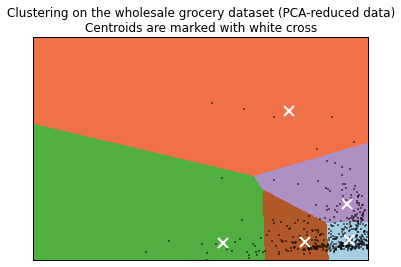

In [22]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, linewidths=2,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 
> **lower- right**: huge number of small customers how are ordeirng very little  
> **lower-left cluster**: bigger customers how are not ordering very much  
> **low-middle cluster**: medium to lagre companys with limited turne-over  
> **middel-right cluster**: smaller customers how order quit heavily  
> **top cluster**: companies of all size ordering a lot  

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
> It seems to me that GMM is fitting the data better with its elipsoid cluster boarders. This fits the distribution of the data better. But KMeans is doing a deacent job as well. I gained the most inside by variing the number of centroids/clusters regardless of the algorithm.
As I mentiond aboave, I think it would make sens to use the third PCs as well. To see if any cluster "splits" in the third dimension, when the data is added.

**9)** How would you use that technique to help the company design new experiments?

Answer:  
> This information can be used for cross- and upselling offers as well as bulk discounts, depending on the cluster.
Sells peapol can use this data to see if a certain customer has weak sells in a certein category, compared with the other "referenc customers" in the cluster. They might be able to identifie oportunities for new offers to these customers.

**10)** How would you use that data to help you predict future customer needs?

Answer:  
> You can make better predictions, if you put a new customer into the designated cluster first and make your predictions from there. Instead of predicting from the whole set of customers i.e. the average customer.